In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import filters

In [10]:
def display_image(img):
    plt.imshow(img,cmap="gray")
    plt.show()

In [15]:
def harris_corner_detector(img,window_size,ksize,k,t):
    Ix = cv2.Sobel(img,cv2.CV_64F,1,0,ksize)
    Iy = cv2.Sobel(img,cv2.CV_64F,0,1,ksize)
    Ixx = Ix*Ix
    Iyy = Iy*Iy
    Ixy = np.multiply(Ix,Iy)
    
    Sxx = cv2.GaussianBlur(Ixx,(window_size,window_size),0)
    Syy = cv2.GaussianBlur(Iyy,(window_size,window_size),0)
    Sxy = cv2.GaussianBlur(Ixy,(window_size,window_size),0)
    
    det = (Sxx * Syy)-(Sxy**2)
    trace = Sxx+Syy
    r = det - k*(trace**2)
    
    res_img = img.copy()
    res_img = cv2.cvtColor(res_img,cv2.COLOR_GRAY2RGB)
    
    corner_points = []
    
    rows,cols = r.shape
    for i in range(rows):
        for j in range(cols):
            if(r[i,j]>t):
                corner_points.append([i,j,r[i,j]])
                res_img.itemset((i,j,0),255)
                res_img.itemset((i,j,1),0)
                res_img.itemset((i,j,2),0)
    return res_img

In [23]:
img = cv2.imread('building.jpg',0)

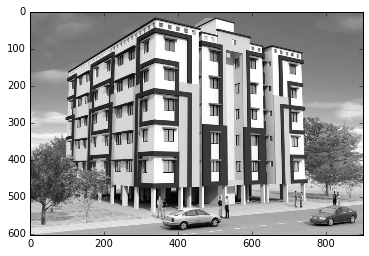

In [24]:
display_image(img)

In [31]:
res_img = harris_corner_detector(img,5,5,0.04,1000)

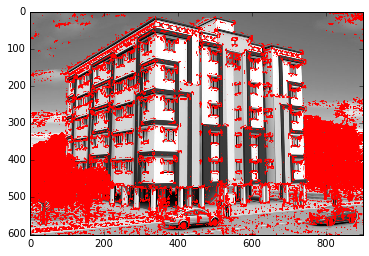

In [32]:
display_image(res_img)

In [18]:
img = cv2.imread('chessboard.png',0)

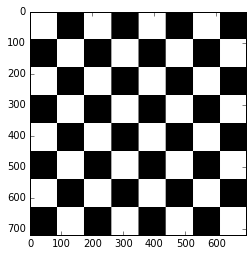

In [19]:
display_image(img)

In [20]:
res_img = harris_corner_detector(img,5,5,0.04,100)

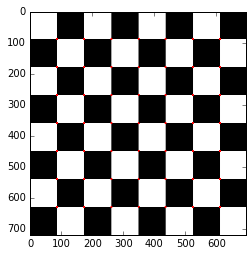

In [21]:
display_image(res_img)